# **Question 6**

Degree 1 Mean Squared Error: 6.5495
Degree 2 Mean Squared Error: 3.3574
Degree 3 Mean Squared Error: 2.8814


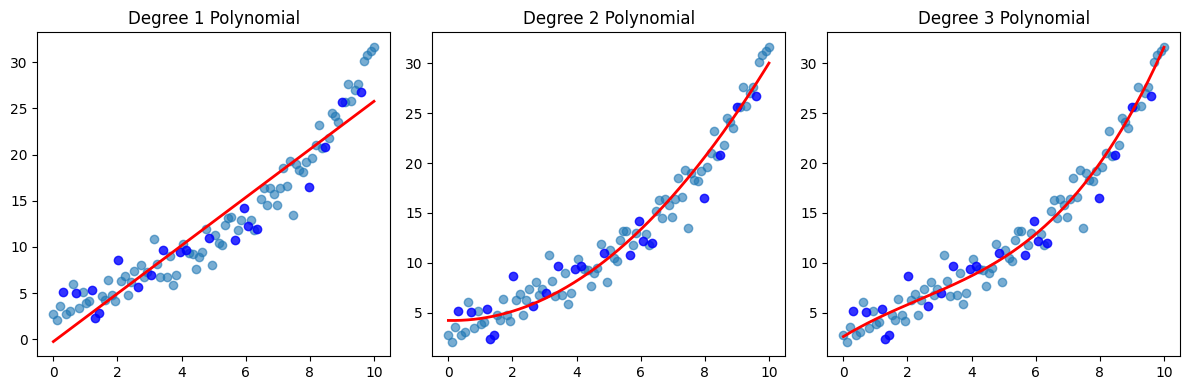

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

x = np.linspace(0, 10, 100)
noise = np.random.normal(0, 1.5, 100)
y = 2 + 3 * x - 0.5 * x**2 + 0.05 * x**3 + noise
X = x.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

x_plot = np.linspace(0, 10, 300).reshape(-1, 1)

models = []
mse_values = []

for d in [1, 2, 3]:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    models.append(model)
    mse_values.append(mse)
    print(f"Degree {d} Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(12, 4))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_train, y_train, alpha=0.6)
    plt.scatter(X_test, y_test, alpha=0.8, color='blue')
    y_plot = models[i].predict(x_plot)
    plt.plot(x_plot, y_plot, color='red', linewidth=2)
    plt.title(f'Degree {i+1} Polynomial')

plt.tight_layout()
plt.show()

# **Question 7**

Saving A2_P2.csv to A2_P2 (7).csv


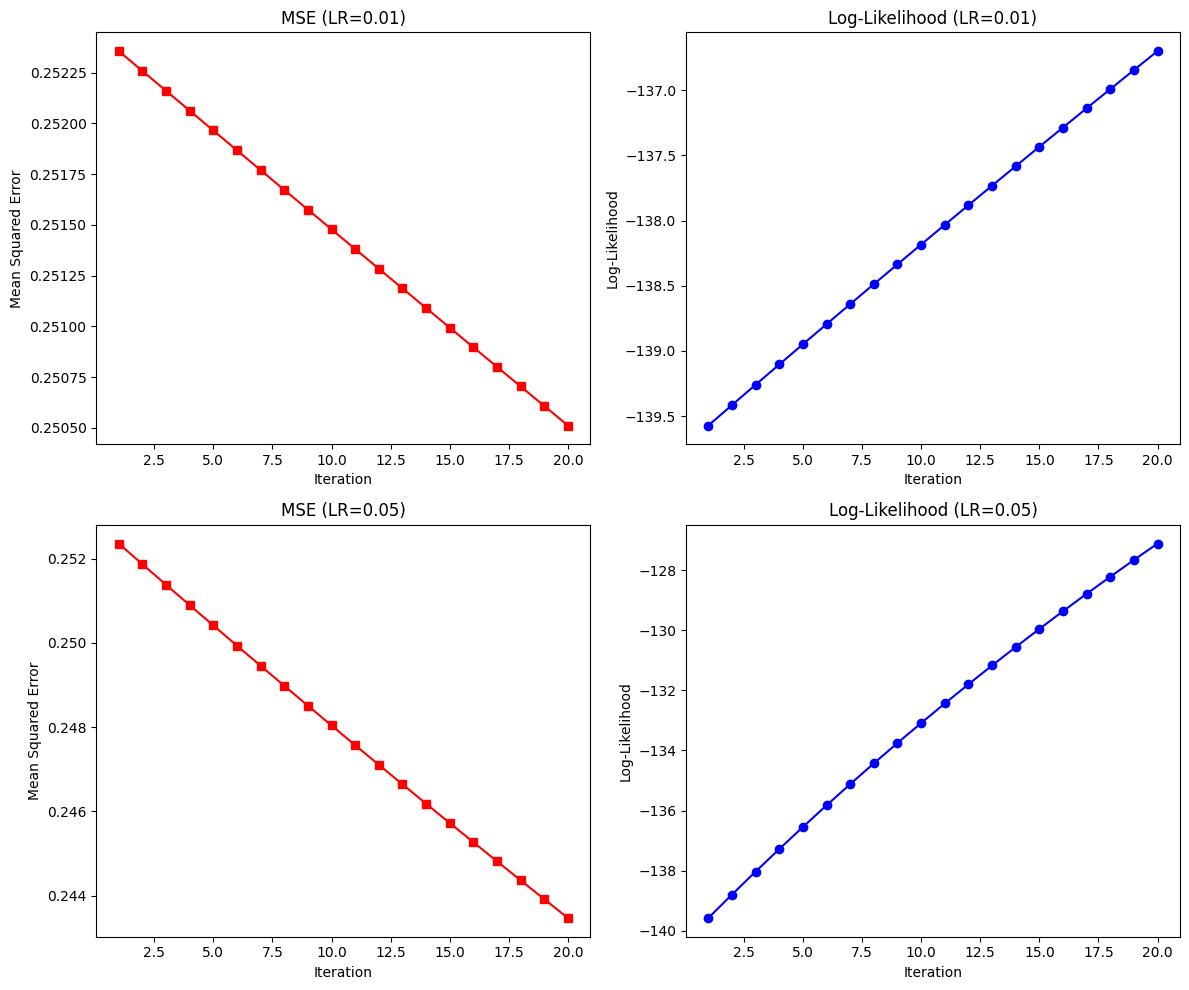


Learning Rate: 0.01
Mean Squared Error Method Weights: Bias=0.005493, w1=0.009164, w2=0.005317
Log-Likelihood Method Weights: Bias=-0.030098, w1=0.024529, w2=-0.008067

Learning Rate: 0.05
Mean Squared Error Method Weights: Bias=-0.041668, w1=0.029602, w2=-0.012517
Log-Likelihood Method Weights: Bias=-0.199859, w1=0.103659, w2=-0.078483


In [19]:
from google.colab import files
uploaded = files.upload()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("A2_P2.csv")
X = df[['Feature 1', 'Feature 2']].values
y = df['Output'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_with_bias = np.column_stack([np.ones(X_scaled.shape[0]), X_scaled])

class LogisticRegression:
    def __init__(self, learning_rate, max_iterations=20):
        self.lr = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.mse_list = []
        self.ll_list = []

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def log_likelihood(self, y_true, y_pred):
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        return np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit_mse(self, X, y):
        n = X.shape[1]
        np.random.seed(0)
        self.weights = np.random.randn(n) * 0.01
        for _ in range(self.max_iterations):
            z = X @ self.weights
            y_pred = self.sigmoid(z)
            self.mse_list.append(self.mse(y, y_pred))
            grad = X.T @ ((y_pred - y) * y_pred * (1 - y_pred)) / len(y)
            self.weights -= self.lr * grad
        return self.weights.copy()

    def fit_ll(self, X, y):
        n = X.shape[1]
        np.random.seed(0)
        self.weights = np.random.randn(n) * 0.01
        for _ in range(self.max_iterations):
            z = X @ self.weights
            y_pred = self.sigmoid(z)
            self.ll_list.append(self.log_likelihood(y, y_pred))
            grad = X.T @ (y - y_pred) / len(y)
            self.weights += self.lr * grad
        return self.weights.copy()

learning_rates = [0.01, 0.05]
mse_models = {}
ll_models = {}

for lr in learning_rates:
    model_mse = LogisticRegression(learning_rate=lr)
    w_mse = model_mse.fit_mse(X_with_bias, y)
    mse_models[lr] = (model_mse, w_mse)

    model_ll = LogisticRegression(learning_rate=lr)
    w_ll = model_ll.fit_ll(X_with_bias, y)
    ll_models[lr] = (model_ll, w_ll)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, lr in enumerate(learning_rates):
    axes[i, 0].plot(range(1, 21), mse_models[lr][0].mse_list, 'rs-')
    axes[i, 0].set_title(f"MSE (LR={lr})")
    axes[i, 0].set_xlabel("Iteration")
    axes[i, 0].set_ylabel("Mean Squared Error")

    axes[i, 1].plot(range(1, 21), ll_models[lr][0].ll_list, 'bo-')
    axes[i, 1].set_title(f"Log-Likelihood (LR={lr})")
    axes[i, 1].set_xlabel("Iteration")
    axes[i, 1].set_ylabel("Log-Likelihood")

plt.tight_layout()
plt.show()

for lr in learning_rates:
    w_mse = mse_models[lr][1]
    w_ll = ll_models[lr][1]
    print(f"\nLearning Rate: {lr}")
    print(f"Mean Squared Error Method Weights: Bias={w_mse[0]:.6f}, w1={w_mse[1]:.6f}, w2={w_mse[2]:.6f}")
    print(f"Log-Likelihood Method Weights: Bias={w_ll[0]:.6f}, w1={w_ll[1]:.6f}, w2={w_ll[2]:.6f}")


# **Question 8**

Saving A2_P3.csv to A2_P3 (4).csv


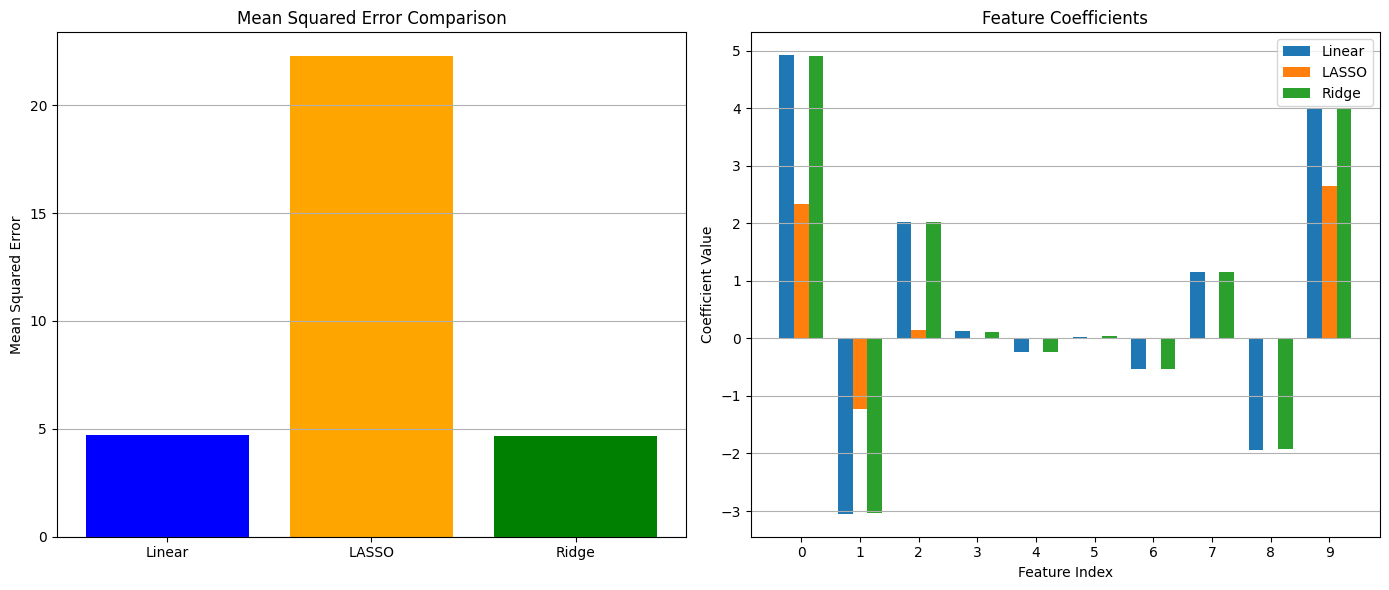

In [20]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('A2_P3.csv')
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear': LinearRegression(),
    'LASSO': Lasso(alpha=2.0),
    'Ridge': Ridge(alpha=0.2)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'mse': mse, 'coef': model.coef_}

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(results.keys(), [res['mse'] for res in results.values()], color=['blue', 'orange', 'green'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('Mean Squared Error')
plt.grid(True, axis='y')

plt.subplot(1, 2, 2)
x = np.arange(len(results['Linear']['coef']))
width = 0.25
for i, (name, res) in enumerate(results.items()):
    plt.bar(x + i*width, res['coef'], width, label=name)
plt.title('Feature Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.grid(True, axis='y')
plt.xticks(x + width, x)
plt.legend()

plt.tight_layout()
plt.show()